<a href="https://colab.research.google.com/github/Delwn/Main-Project/blob/main/ArtificialNeuralNetworks_(IR_0_021).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#importing packages
import pandas as pd
import numpy as np
import tensorflow as tf


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
dataset=pd.read_csv("/content/drive/MyDrive/Project files/finalfile.csv")
dataset

,DE,FE,fault
0,-0.402027,-0.058965,1
1,0.548219,0.221480,1
2,0.931565,0.044173,1
3,-0.218881,-0.017669,1
4,-1.079788,0.187580,1
...,...,...,...
121152,-0.042349,0.098824,0
121153,-0.013560,0.042940,0
121154,0.057369,0.024655,0
121155,0.095129,0.000205,0


In [14]:
x=dataset.drop(columns=["fault"])
y=dataset["fault"]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [18]:
classifier = Sequential()

In [19]:
classifier.add(Dense(units=64, kernel_initializer='uniform', activation='relu', input_dim=2))

In [20]:
classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))

In [21]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [22]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4417 (17.25 KB)
Trainable params: 4417 (17.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model = classifier.fit(X_train, y_train, batch_size = 1000, epochs = 100, shuffle = False)


Epoch 1/100
97/97 [==============================] - 1s 4ms/step - loss: 0.6111 - accuracy: 0.6701
Epoch 2/100
97/97 [==============================] - 0s 4ms/step - loss: 0.4183 - accuracy: 0.8403
Epoch 3/100
97/97 [==============================] - 0s 4ms/step - loss: 0.3501 - accuracy: 0.8487
Epoch 4/100
97/97 [==============================] - 0s 5ms/step - loss: 0.3456 - accuracy: 0.8489
Epoch 5/100
97/97 [==============================] - 1s 6ms/step - loss: 0.3450 - accuracy: 0.8493
Epoch 6/100
97/97 [==============================] - 1s 6ms/step - loss: 0.3447 - accuracy: 0.8491
Epoch 7/100
97/97 [==============================] - 1s 6ms/step - loss: 0.3444 - accuracy: 0.8493
Epoch 8/100
97/97 [==============================] - 1s 6ms/step - loss: 0.3442 - accuracy: 0.8495
Epoch 9/100
97/97 [==============================] - 1s 6ms/step - loss: 0.3441 - accuracy: 0.8496
Epoch 10/100
97/97 [==============================] - 1s 6ms/step - loss: 0.3440 - accuracy: 0.8496
Epoch 11/

In [24]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

758/758 [==============================] - 1s 1ms/step


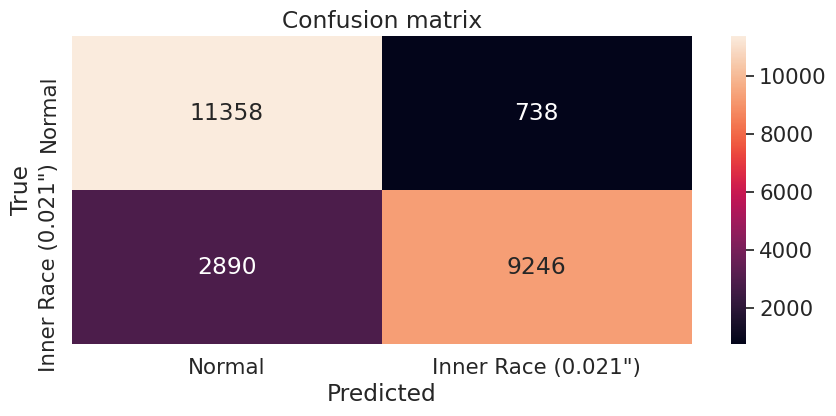

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal', 'Inner Race (0.021")']
columns = ['Normal', 'Inner Race (0.021")']
cm_df = pd.DataFrame(cm,columns,index)


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.show()

In [26]:
classifier.evaluate(X_test, y_test)

758/758 [==============================] - 2s 2ms/step - loss: 0.3424 - accuracy: 0.8503


[0.34240058064460754, 0.8502806425094604]

In [27]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal', 'Inner Race (0.021")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       0.80      0.94      0.86     12096
Inner Race (0.021")       0.93      0.76      0.84     12136

           accuracy                           0.85     24232
          macro avg       0.86      0.85      0.85     24232
       weighted avg       0.86      0.85      0.85     24232



In [28]:
normal, IR = cm
anomalies = normal[1] + IR[0]
print("Anomalies: {}".format(anomalies))

Anomalies: 3628


To further re-train your model, use
**tf.keras.models.save_model() to save a model**
**tf.keras.models.load_model() to load a model.**

In [29]:
path_to_save_model = '/content/drive/MyDrive/project files/model_name.keras'
tf.keras.models.save_model(classifier, path_to_save_model)